In [1]:
# getting mocap data
from support.funcs import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_mocap,starttime=read_df_csv(r'C:\Users\arpan\OneDrive\Documents\internship\mocapcsv\arpan_t2.csv')

# converting to epoch time
epoch_time = starttime.timestamp() 
time=df_mocap['seconds'].to_numpy()
time=time+epoch_time
df_mocap.insert(1,'epoch_time',time)
df_mocap.columns

Index(['seconds', 'epoch_time', 'le_x', 'le_y', 'le_z', 'ls_x', 'ls_y', 'ls_z',
       'lw_x', 'lw_y', 'lw_z', 're_x', 're_y', 're_z', 'rs_x', 'rs_y', 'rs_z',
       'rw_x', 'rw_y', 'rw_z', 'tr_x', 'tr_y', 'tr_z'],
      dtype='object')

In [2]:
# getting mpipe data
df_mpipe=pd.read_csv('mpipe.csv')
df_mpipe

,epoch_time,ls_x,ls_y,ls_z,le_x,le_y,le_z,lw_x,lw_y,lw_z,...,rs_z,re_x,re_y,re_z,rw_x,rw_y,rw_z,tr_x,tr_y,tr_z
0,1.685773e+09,-0.07980,-0.2896,1.438,-0.04790,0.00679,1.481,-0.02133,0.2986,1.448,...,1.381,-0.4368,0.03833,1.440,-0.4377,0.3145,1.398,-0.2360,-0.2367,1.379
1,1.685773e+09,-0.07840,-0.2888,1.442,-0.04828,0.01177,1.492,-0.02121,0.2969,1.440,...,1.379,-0.4353,0.03806,1.430,-0.4316,0.3098,1.378,-0.2360,-0.2367,1.379
2,1.685773e+09,-0.07830,-0.2883,1.440,-0.04790,0.01331,1.481,-0.02121,0.2952,1.440,...,1.385,-0.4353,0.03964,1.430,-0.4310,0.3093,1.376,-0.2351,-0.2344,1.374
3,1.685773e+09,-0.07806,-0.2876,1.436,-0.04807,0.01500,1.486,-0.02133,0.2969,1.448,...,1.381,-0.4358,0.03967,1.432,-0.4316,0.3096,1.383,-0.2355,-0.2362,1.376
4,1.685773e+09,-0.07684,-0.2888,1.442,-0.04828,0.01834,1.492,-0.02283,0.2942,1.442,...,1.376,-0.4355,0.04422,1.426,-0.4287,0.3074,1.374,-0.2355,-0.2346,1.376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1.685773e+09,-0.17330,-0.2908,1.376,-0.12630,0.01756,1.428,-0.08344,0.2870,1.393,...,1.283,-0.5330,0.05862,1.359,-0.5005,0.3262,1.327,-0.3257,-0.2236,1.278
492,1.685773e+09,-0.17290,-0.2898,1.372,-0.13010,0.01762,1.434,-0.08320,0.2864,1.389,...,1.276,-0.5260,0.05762,1.336,-0.4995,0.3237,1.317,-0.3280,-0.2241,1.281
493,1.685773e+09,-0.17150,-0.2903,1.374,-0.12980,0.02074,1.430,-0.08514,0.2878,1.396,...,1.278,-0.5337,0.05850,1.356,-0.5005,0.3225,1.312,-0.3264,-0.2241,1.281
494,1.685773e+09,-0.17050,-0.2913,1.378,-0.13150,0.02077,1.432,-0.08527,0.2880,1.398,...,1.275,-0.5327,0.05840,1.354,-0.4993,0.3218,1.309,-0.3276,-0.2250,1.286


In [3]:
# converting mpipe to mocap frame
rotmat=[]
org=[]
with open(r'C:\Users\arpan\OneDrive\Documents\internship\D435_rotmat.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        x=x.replace(']','')
        x=x.replace('[','')
        line=x.split(' ')
        while ' ' in line:
            line=line.remove(' ')
        #k_rotmat.append([float(x)])
        while '' in line:
            ind=line.index('')
            line.pop(ind)
        x=[]
        for i in line:
            x.append(float(i))
        rotmat.append(x)
    rotmat=np.array(rotmat)

with open(r'C:\Users\arpan\OneDrive\Documents\internship\D435_org.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        x=x.replace(']','')
        x=x.replace('[','')
        org.append([float(x)])
    k_org=np.array(org)

# print(rotmat)
# print(org)

def frame_con(point,rotmat,org):
    point=np.array(point)
    point=point.reshape(3,1)
    point=point-org 
    point=np.matmul(rotmat.T,point)
    return point

for index,j in df_mpipe.iterrows():
    for k in range(1,1+7*3,3):
        point=[]
        for p in range(k,k+3):
            point.append(j[p])
        converted_point=frame_con(point,rotmat,org)
        # print(converted_point)
        for o in range(3):
            df_mpipe.iloc[index,k+o]=converted_point[o]

df_mpipe


,epoch_time,ls_x,ls_y,ls_z,le_x,le_y,le_z,lw_x,lw_y,lw_z,...,rs_z,re_x,re_y,re_z,rw_x,rw_y,rw_z,tr_x,tr_y,tr_z
0,1.685773e+09,-0.212037,0.604780,-0.173982,-0.181708,0.305125,-0.174760,-0.155668,0.020846,-0.100901,...,-0.110773,-0.570122,0.281771,-0.124679,-0.571376,0.014396,-0.043785,-0.367602,0.561630,-0.106044
1,1.685773e+09,-0.210694,0.603412,-0.177845,-0.182254,0.298633,-0.184933,-0.155435,0.023666,-0.093226,...,-0.108971,-0.568487,0.283454,-0.114839,-0.564991,0.021863,-0.024738,-0.367602,0.561630,-0.106044
2,1.685773e+09,-0.210568,0.603201,-0.175796,-0.181730,0.298672,-0.173832,-0.155429,0.025349,-0.093468,...,-0.115011,-0.568492,0.281890,-0.114614,-0.564362,0.022639,-0.022837,-0.366642,0.560061,-0.100780
3,1.685773e+09,-0.210277,0.603076,-0.171740,-0.181973,0.296288,-0.178537,-0.155662,0.022529,-0.101143,...,-0.110968,-0.569019,0.281578,-0.116583,-0.565058,0.021349,-0.029715,-0.367063,0.561560,-0.103011
4,1.685773e+09,-0.209134,0.603404,-0.177865,-0.182275,0.292130,-0.183998,-0.157072,0.026063,-0.095569,...,-0.105877,-0.568653,0.277927,-0.110001,-0.562029,0.024792,-0.021158,-0.367068,0.559976,-0.102783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,1.685773e+09,-0.304687,0.615279,-0.111585,-0.259421,0.302416,-0.119760,-0.216991,0.040478,-0.047316,...,-0.009427,-0.665287,0.273716,-0.040382,-0.633250,0.013247,0.028961,-0.455973,0.563504,-0.003061
492,1.685773e+09,-0.304236,0.614856,-0.107489,-0.263302,0.301523,-0.125641,-0.216695,0.041640,-0.043446,...,-0.002292,-0.657974,0.277942,-0.017851,-0.632107,0.017139,0.038490,-0.458312,0.563584,-0.006071
493,1.685773e+09,-0.302862,0.615059,-0.109557,-0.262959,0.299002,-0.121242,-0.218734,0.039268,-0.050150,...,-0.004318,-0.665946,0.274266,-0.037421,-0.633036,0.019043,0.043281,-0.456712,0.563576,-0.006092
494,1.685773e+09,-0.301913,0.615474,-0.113671,-0.264685,0.298697,-0.123195,-0.218892,0.038787,-0.052099,...,-0.001464,-0.664919,0.274644,-0.035469,-0.631793,0.020157,0.046135,-0.457976,0.563762,-0.011153


In [4]:
# occlusion based on limb length
df_limb=pd.read_csv('limbl.csv')
olu,oll,oru,orl,oss=[0],[0],[0],[0],[0]
th=0.10 # 10cm
for i in range(1,len(df_limb)):
    if abs(df_limb['lu'][i]-df_limb['lu'].mean())>th:
        olu.append(1)
    else:
        olu.append(0)
    if abs(df_limb['ll'][i]-df_limb['ll'].mean())>th:
        oll.append(1)
    else:
        oll.append(0)
    if abs(df_limb['ru'][i]-df_limb['ru'].mean())>th:
        oru.append(1)
    else:
        oru.append(0)
    if abs(df_limb['rl'][i]-df_limb['rl'].mean())>th:
        orl.append(1)
    else:
        orl.append(0)
    if abs(df_limb['ss'][i]-df_limb['ss'].mean())>th:
        oss.append(1)
    else:
        oss.append(0)

In [5]:
# filtering occlusion limb length
for index,j in df_mpipe.iterrows():
    
    for k in range(3):
        if oss[index]==0 and olu[index]==0:
            lsx=df_mpipe['ls_x'].iloc[index]
            lsy=df_mpipe['ls_y'].iloc[index]
            lsz=df_mpipe['ls_z'].iloc[index]
        df_mpipe['ls_x'].iloc[index]=lsx
        df_mpipe['ls_y'].iloc[index]=lsy
        df_mpipe['ls_z'].iloc[index]=lsz
        
    for k in range(3):
        if oll[index]==0 and olu[index]==0:
            lex=df_mpipe['le_x'].iloc[index]
            ley=df_mpipe['le_y'].iloc[index]
            lez=df_mpipe['le_z'].iloc[index]
        df_mpipe['le_x'].iloc[index]=lex
        df_mpipe['le_y'].iloc[index]=ley
        df_mpipe['le_z'].iloc[index]=lez

    for k in range(3):
        if oll[index]==0:
            lwx=df_mpipe['lw_x'].iloc[index]
            lwy=df_mpipe['lw_y'].iloc[index]
            lwz=df_mpipe['lw_z'].iloc[index]
        df_mpipe['lw_x'].iloc[index]=lwx
        df_mpipe['lw_y'].iloc[index]=lwy
        df_mpipe['lw_z'].iloc[index]=lwz

    for k in range(3):
        if oss[index]==0 and oru[index]==0:
            rsx=df_mpipe['rs_x'].iloc[index]
            rsy=df_mpipe['rs_y'].iloc[index]
            rsz=df_mpipe['rs_z'].iloc[index]
        df_mpipe['rs_x'].iloc[index]=rsx
        df_mpipe['rs_y'].iloc[index]=rsy
        df_mpipe['rs_z'].iloc[index]=rsz

    for k in range(3):
        if orl[index]==0 and oru[index]==0:
            rex=df_mpipe['re_x'].iloc[index]
            rey=df_mpipe['re_y'].iloc[index]
            rez=df_mpipe['re_z'].iloc[index]
        df_mpipe['re_x'].iloc[index]=rex
        df_mpipe['re_y'].iloc[index]=rey
        df_mpipe['re_z'].iloc[index]=rez

    for k in range(3):
        if orl[index]==0 and oru[index]==0:
            rwx=df_mpipe['rw_x'].iloc[index]
            rwy=df_mpipe['rw_y'].iloc[index]
            rwz=df_mpipe['rw_z'].iloc[index]
        df_mpipe['rw_x'].iloc[index]=rwx
        df_mpipe['rw_y'].iloc[index]=rwy
        df_mpipe['rw_z'].iloc[index]=rwz


In [6]:
def pvt(x,t):
    from scipy.signal import savgol_filter
    y=[]
    for i in x:
        y.append(i)
    # y=[i for i in y if str(i) != 'nan']
    w = savgol_filter(y,  20,2)
    plt.plot(t,w)
    # plt.ylim(-1,1)
    plt.xlabel('time(s)')

    

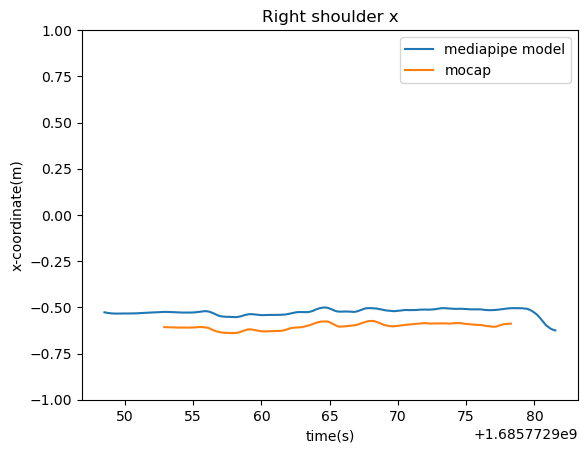

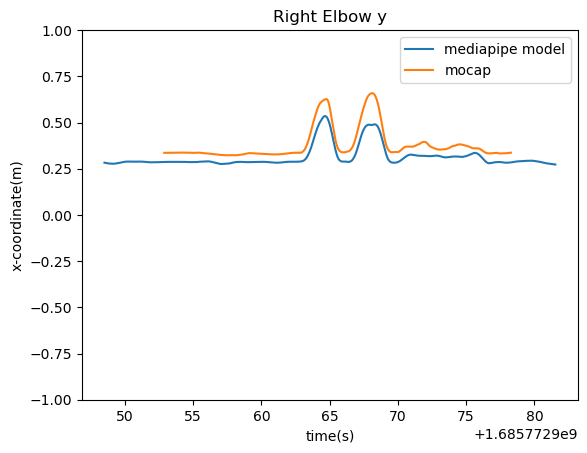

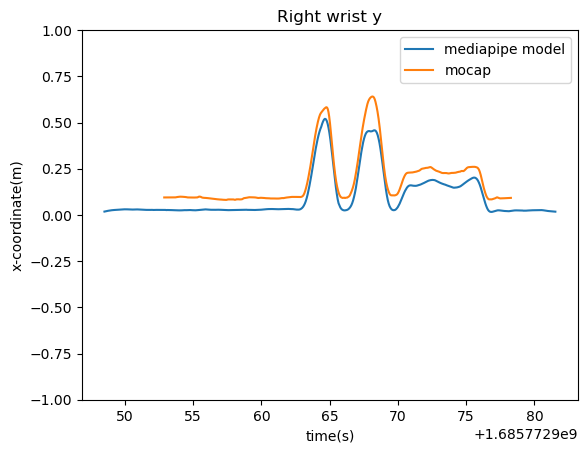

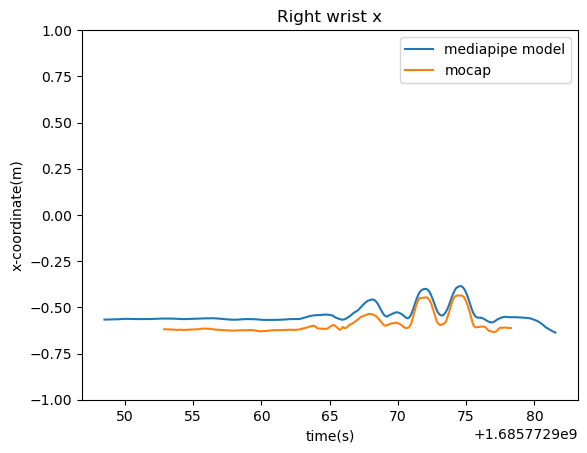

In [7]:
# position test plot
pvt(df_mpipe['rs_x'].to_numpy(),df_mpipe['epoch_time'])
pvt(df_mocap['rs_x'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right shoulder x')
plt.ylim(-1,1)
plt.show()

pvt(df_mpipe['re_y'].to_numpy(),df_mpipe['epoch_time'])
pvt(df_mocap['re_y'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right Elbow y')
plt.ylim(-1,1)
plt.show()

# pvt(df_mpipe['re_z'].to_numpy(),df_mpipe['epoch_time'])
# pvt(df_mocap['re_z'].to_numpy(),df_mocap['epoch_time'])
# plt.ylabel('x-coordinate(m)')
# plt.legend(['mediapipe model','mocap'])
# plt.title('Right Elbow z')
# plt.ylim(-1,1)
# plt.show()

pvt(df_mpipe['rw_y'].to_numpy(),df_mpipe['epoch_time'])
pvt(df_mocap['rw_y'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right wrist y')
plt.ylim(-1,1)
plt.show()

pvt(df_mpipe['rw_x'].to_numpy(),df_mpipe['epoch_time'])
pvt(df_mocap['rw_x'].to_numpy(),df_mocap['epoch_time'])
plt.ylabel('x-coordinate(m)')
plt.legend(['mediapipe model','mocap'])
plt.title('Right wrist x')
plt.ylim(-1,1)
plt.show()

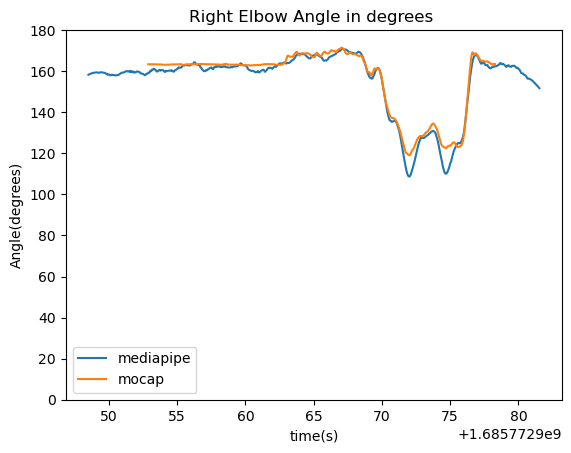

RMSE of Right Elbow Angle: 3.173865910903033


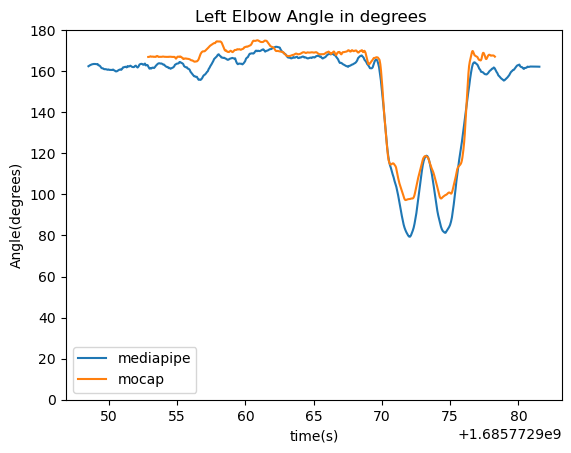

RMSE of Left Elbow Angle: 6.8593285757899505


In [8]:
#calculating the elbow angle
mpipeRightElbowAngle, mocapRightElbowAngle=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeRightElbowAngle.append(angle3point([df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                                            [df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],
                                            [df_mpipe['rw_x'][i],df_mpipe['rw_y'][i],df_mpipe['rw_z'][i]]))
    
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapRightElbowAngle.append(angle3point([df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                                            [df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],
                                            [df_mocap['rw_x'][i],df_mocap['rw_y'][i],df_mocap['rw_z'][i]]))
    
#test graph right elbow angle wihtout occlusion
pvt(mpipeRightElbowAngle,df_mpipe['epoch_time'])
pvt(mocapRightElbowAngle,df_mocap['epoch_time'])
plt.title('Right Elbow Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()

print('RMSE of Right Elbow Angle:',RMSE(mocapRightElbowAngle,mpipeRightElbowAngle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLeftElbowAngle, mocapLeftElbowAngle=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeLeftElbowAngle.append(angle3point([df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]],
                                           [df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],
                                           [df_mpipe['lw_x'][i],df_mpipe['lw_y'][i],df_mpipe['lw_z'][i]]))
   
for i in range(len(df_mocap['epoch_time'].tolist())):
    mocapLeftElbowAngle.append(angle3point([df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]],
                                           [df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],
                                           [df_mocap['lw_x'][i],df_mocap['lw_y'][i],df_mocap['lw_z'][i]]))
   
#test graph left elbow angle wihtout occlusion
pvt(mpipeLeftElbowAngle,df_mpipe['epoch_time'])
pvt(mocapLeftElbowAngle,df_mocap['epoch_time'])
plt.title('Left Elbow Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()


print('RMSE of Left Elbow Angle:',RMSE(mocapLeftElbowAngle,mpipeLeftElbowAngle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


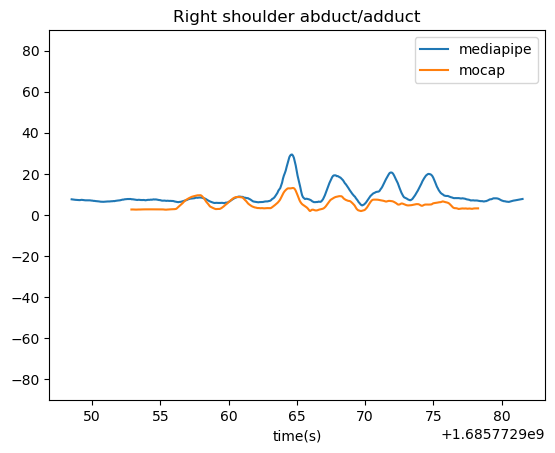

RMSE of abduct/adduct:  6.201373129549191


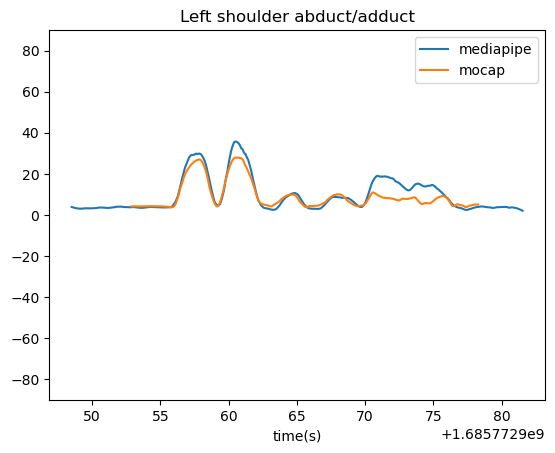

RMSE of abduct/adduct:  4.067594973933416


In [9]:
#adductangle project elbow point on frontal plane formed by tr,ls,rs then find angle between shoulder and porject and subtract 90degrees
mpipeRightaductangle=[]
mocapRightaductangle=[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    projection=project_onto_plane([df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],
                                  [[df_mpipe['tr_x'][i],df_mpipe['tr_y'][i],df_mpipe['tr_z'][i]],
                                   [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                                   [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]]])    
                             
    mpipeRightaductangle.append(angle3point([df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]],
                                       [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                                        projection)-90)

for i in range(len(df_mocap['epoch_time'].tolist())):
    projection=project_onto_plane([df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],
                                  [[df_mocap['tr_x'][i],df_mocap['tr_y'][i],df_mocap['tr_z'][i]],
                                   [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                                   [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]]])    
                             
    mocapRightaductangle.append(angle3point([df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]],
                                       [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                                        projection)-90)

pvt(mpipeRightaductangle,df_mpipe['epoch_time'])
pvt(mocapRightaductangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('Right shoulder abduct/adduct')
plt.ylim(-90,90)
plt.show()

print('RMSE of abduct/adduct: ',RMSE(mocapRightaductangle,mpipeRightaductangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLeftaductangle=[]
mocapLeftaductangle=[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    projection=project_onto_plane([df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],
                                  [[df_mpipe['tr_x'][i],df_mpipe['tr_y'][i],df_mpipe['tr_z'][i]],
                                   [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                                   [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]]])    
                             
    mpipeLeftaductangle.append(angle3point([df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                                           [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]],
                                            projection)-90)


for i in range(len(df_mocap['epoch_time'].tolist())):
    projection=project_onto_plane([df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],
                                  [[df_mocap['tr_x'][i],df_mocap['tr_y'][i],df_mocap['tr_z'][i]],
                                   [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                                   [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]]])    
                             
    mocapLeftaductangle.append(angle3point([df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                                           [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]],
                                            projection)-90)

pvt(mpipeLeftaductangle,df_mpipe['epoch_time'])
pvt(mocapLeftaductangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('Left shoulder abduct/adduct')
plt.ylim(-90,90)
plt.show()


print('RMSE of abduct/adduct: ',RMSE(mocapLeftaductangle,mpipeLeftaductangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

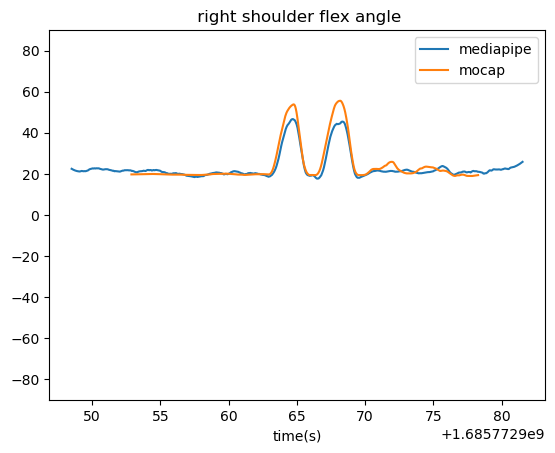

RMSE of flexangle: 3.051628756187666


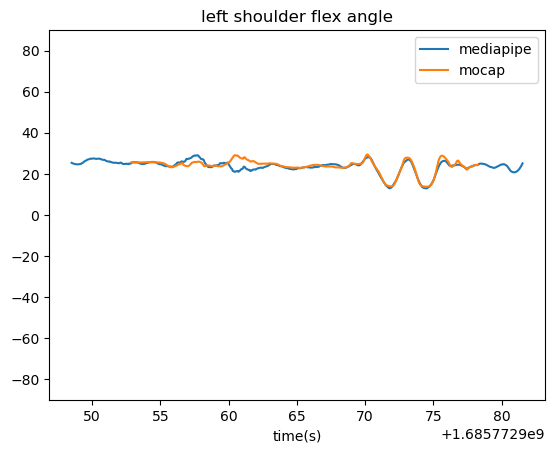

RMSE of flexangle: 1.825068246331641


In [10]:
#flexangle using elbow point projection onto saggital plane then angle between point below shoulder, shoulder, elbow projection
mpipeRightflexangle=[]
mocapRightflexangle=[]


for i in range(len(df_mpipe['epoch_time'])):
    orthplane=sag_plane([[df_mpipe['tr_x'][i],df_mpipe['tr_y'][i],df_mpipe['tr_z'][i]],
                         [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                         [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]]])
    projection1=project_onto_plane([df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],orthplane)
    mpipeRightflexangle.append(angle3point([orthplane[2][0]-df_mpipe['rs_x'][i],orthplane[2][1]-df_mpipe['rs_y'][i],orthplane[2][2]-df_mpipe['rs_z'][i]],
                                 [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],projection1))

for i in range(len(df_mocap['epoch_time'])):
    orthplane=sag_plane([[df_mocap['tr_x'][i],df_mocap['tr_y'][i],df_mocap['tr_z'][i]],
                         [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                         [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]]])
    projection1=project_onto_plane([df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],orthplane)
    mocapRightflexangle.append(angle3point([orthplane[2][0]-df_mocap['rs_x'][i],orthplane[2][1]-df_mocap['rs_y'][i],orthplane[2][2]-df_mocap['rs_z'][i]],
                                 [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],projection1))

pvt(mpipeRightflexangle,df_mpipe['epoch_time'])
pvt(mocapRightflexangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title(' right shoulder flex angle')
plt.ylim(-90,90)
plt.show()

print('RMSE of flexangle:',RMSE(mocapRightflexangle,mpipeRightflexangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLeftflexangle=[]
mocapLeftflexangle=[]

for i in range(len(df_mpipe['epoch_time'])):
    orthplane=sag_plane([[df_mpipe['tr_x'][i],df_mpipe['tr_y'][i],df_mpipe['tr_z'][i]],
                         [df_mpipe['rs_x'][i],df_mpipe['rs_y'][i],df_mpipe['rs_z'][i]],
                         [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]]])
    projection1=project_onto_plane([df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],orthplane)
    mpipeLeftflexangle.append(angle3point([orthplane[2][0]-df_mpipe['ls_x'][i],orthplane[2][1]-df_mpipe['ls_y'][i],orthplane[2][2]-df_mpipe['ls_z'][i]],
                                 [df_mpipe['ls_x'][i],df_mpipe['ls_y'][i],df_mpipe['ls_z'][i]],projection1))

for i in range(len(df_mocap['epoch_time'])):
    orthplane=sag_plane([[df_mocap['tr_x'][i],df_mocap['tr_y'][i],df_mocap['tr_z'][i]],
                         [df_mocap['rs_x'][i],df_mocap['rs_y'][i],df_mocap['rs_z'][i]],
                         [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]]])
    projection1=project_onto_plane([df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],orthplane)
    mocapLeftflexangle.append(angle3point([orthplane[2][0]-df_mocap['ls_x'][i],orthplane[2][1]-df_mocap['ls_y'][i],orthplane[2][2]-df_mocap['ls_z'][i]],
                                 [df_mocap['ls_x'][i],df_mocap['ls_y'][i],df_mocap['ls_z'][i]],projection1))

pvt(mpipeLeftflexangle,df_mpipe['epoch_time'])
pvt(mocapLeftflexangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left shoulder flex angle')
plt.ylim(-90,90)
plt.show()


print('RMSE of flexangle:',RMSE(mocapLeftflexangle,mpipeLeftflexangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


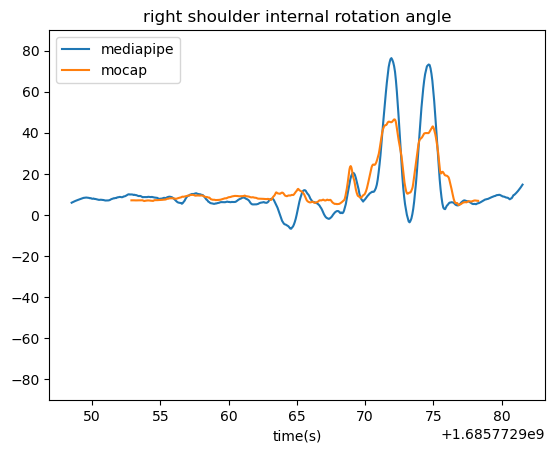

RMSE of internal rotion angle: 8.9447272854503


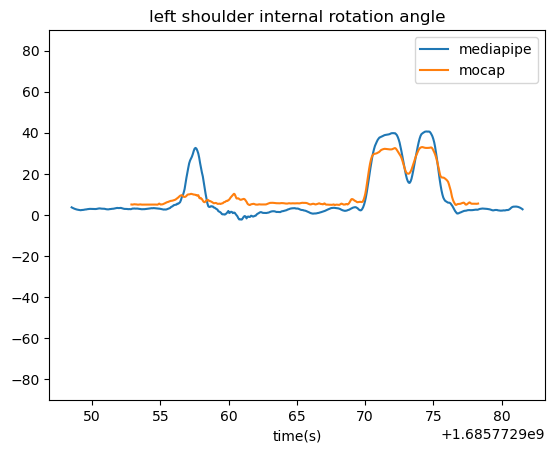

RMSE of internal rotion angle: 5.991315690111586


In [11]:
# int rot: find ref vec perp to frontal noramal and ua. project wrist onto plane containing e, e+nv,e+rv. angle between projection,e,rv

mpipeRightintrangle=[]
mocapRightintrangle=[]


for i in range(len(df_mpipe['epoch_time'])):
    v1=np.array([df_mpipe['tr_x'][i]-df_mpipe['rs_x'][i],df_mpipe['tr_y'][i]-df_mpipe['rs_y'][i],df_mpipe['tr_z'][i]-df_mpipe['rs_z'][i]])
    v2=np.array([df_mpipe['ls_x'][i]-df_mpipe['rs_x'][i],df_mpipe['ls_y'][i]-df_mpipe['rs_y'][i],df_mpipe['ls_z'][i]-df_mpipe['rs_z'][i]])
    uav=np.array([df_mpipe['rs_x'][i]-df_mpipe['re_x'][i],df_mpipe['rs_y'][i]-df_mpipe['re_y'][i],df_mpipe['rs_z'][i]-df_mpipe['re_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],
               [df_mpipe['re_x'][i]+rv[0],df_mpipe['re_y'][i]+rv[1],df_mpipe['re_z'][i]+rv[2]],
               [df_mpipe['re_x'][i]+nv[0],df_mpipe['re_y'][i]+nv[1],df_mpipe['re_z'][i]+nv[2]]]
                
    projection1=project_onto_plane([df_mpipe['rw_x'][i],df_mpipe['rw_y'][i],df_mpipe['rw_z'][i]],orthplane)
    mpipeRightintrangle.append(angle3point([df_mpipe['re_x'][i]+rv[0],df_mpipe['re_y'][i]+rv[1],df_mpipe['re_z'][i]+rv[2]],
                                           [df_mpipe['re_x'][i],df_mpipe['re_y'][i],df_mpipe['re_z'][i]],projection1)-90)

for i in range(len(df_mocap['epoch_time'])):
    v1=np.array([df_mocap['tr_x'][i]-df_mocap['rs_x'][i],df_mocap['tr_y'][i]-df_mocap['rs_y'][i],df_mocap['tr_z'][i]-df_mocap['rs_z'][i]])
    v2=np.array([df_mocap['ls_x'][i]-df_mocap['rs_x'][i],df_mocap['ls_y'][i]-df_mocap['rs_y'][i],df_mocap['ls_z'][i]-df_mocap['rs_z'][i]])
    uav=np.array([df_mocap['rs_x'][i]-df_mocap['re_x'][i],df_mocap['rs_y'][i]-df_mocap['re_y'][i],df_mocap['rs_z'][i]-df_mocap['re_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],
               [df_mocap['re_x'][i]+rv[0],df_mocap['re_y'][i]+rv[1],df_mocap['re_z'][i]+rv[2]],
               [df_mocap['re_x'][i]+nv[0],df_mocap['re_y'][i]+nv[1],df_mocap['re_z'][i]+nv[2]]]
               
    projection1=project_onto_plane([df_mocap['rw_x'][i],df_mocap['rw_y'][i],df_mocap['rw_z'][i]],orthplane)
    mocapRightintrangle.append(angle3point([df_mocap['re_x'][i]+rv[0],df_mocap['re_y'][i]+rv[1],df_mocap['re_z'][i]+rv[2]],
                                           [df_mocap['re_x'][i],df_mocap['re_y'][i],df_mocap['re_z'][i]],projection1)-90)


pvt(mpipeRightintrangle,df_mpipe['epoch_time'])
pvt(mocapRightintrangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('right shoulder internal rotation angle')
plt.ylim(-90,90)
plt.show()

print('RMSE of internal rotion angle:',RMSE(mocapRightintrangle,mpipeRightintrangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLeftintrangle=[]
mocapLeftintrangle=[]

for i in range(len(df_mpipe['epoch_time'])):
    v1=np.array([df_mpipe['tr_x'][i]-df_mpipe['ls_x'][i],df_mpipe['tr_y'][i]-df_mpipe['ls_y'][i],df_mpipe['tr_z'][i]-df_mpipe['ls_z'][i]])
    v2=np.array([df_mpipe['rs_x'][i]-df_mpipe['ls_x'][i],df_mpipe['rs_y'][i]-df_mpipe['ls_y'][i],df_mpipe['rs_z'][i]-df_mpipe['ls_z'][i]])
    uav=np.array([df_mpipe['ls_x'][i]-df_mpipe['le_x'][i],df_mpipe['ls_y'][i]-df_mpipe['le_y'][i],df_mpipe['ls_z'][i]-df_mpipe['le_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],
               [df_mpipe['le_x'][i]+rv[0],df_mpipe['le_y'][i]+rv[1],df_mpipe['le_z'][i]+rv[2]],
               [df_mpipe['le_x'][i]+nv[0],df_mpipe['le_y'][i]+nv[1],df_mpipe['le_z'][i]+nv[2]]]
               
    projection1=project_onto_plane([df_mpipe['lw_x'][i],df_mpipe['lw_y'][i],df_mpipe['lw_z'][i]],orthplane)
    mpipeLeftintrangle.append(angle3point([df_mpipe['le_x'][i]+rv[0],df_mpipe['le_y'][i]+rv[1],df_mpipe['le_z'][i]+rv[2]],
                                           [df_mpipe['le_x'][i],df_mpipe['le_y'][i],df_mpipe['le_z'][i]],projection1)-90)

for i in range(len(df_mocap['epoch_time'])):
    v1=np.array([df_mocap['tr_x'][i]-df_mocap['ls_x'][i],df_mocap['tr_y'][i]-df_mocap['ls_y'][i],df_mocap['tr_z'][i]-df_mocap['ls_z'][i]])
    v2=np.array([df_mocap['rs_x'][i]-df_mocap['ls_x'][i],df_mocap['rs_y'][i]-df_mocap['ls_y'][i],df_mocap['rs_z'][i]-df_mocap['ls_z'][i]])
    uav=np.array([df_mocap['ls_x'][i]-df_mocap['le_x'][i],df_mocap['ls_y'][i]-df_mocap['le_y'][i],df_mocap['ls_z'][i]-df_mocap['le_z'][i]])
    nv=np.cross(v1,v2)
    rv=np.cross(nv,uav)
    orthplane=[[df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],
               [df_mocap['le_x'][i]+rv[0],df_mocap['le_y'][i]+rv[1],df_mocap['le_z'][i]+rv[2]],
               [df_mocap['le_x'][i]+nv[0],df_mocap['le_y'][i]+nv[1],df_mocap['le_z'][i]+nv[2]]]
               
    projection1=project_onto_plane([df_mocap['lw_x'][i],df_mocap['lw_y'][i],df_mocap['lw_z'][i]],orthplane)
    mocapLeftintrangle.append(angle3point([df_mocap['le_x'][i]+rv[0],df_mocap['le_y'][i]+rv[1],df_mocap['le_z'][i]+rv[2]],
                                           [df_mocap['le_x'][i],df_mocap['le_y'][i],df_mocap['le_z'][i]],projection1)-90)

pvt(mpipeLeftintrangle,df_mpipe['epoch_time'])
pvt(mocapLeftintrangle,df_mocap['epoch_time'])
plt.legend(['mediapipe','mocap'])
plt.title('left shoulder internal rotation angle')
plt.ylim(-90,90)
plt.show()

print('RMSE of internal rotion angle:',RMSE(mocapLeftintrangle,mpipeLeftintrangle,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

t1 4.64 3.98 3.29 3.01 11.4 6.68

eu 2.67 7.99 7.25 4.79 9.00 21.1

t2 6.20 4.06 3.05 1.82 8.94 5.99

eu 2.45 3.75 2.65 2.70 9.67 21.1